The new analysis with more data cleaning and preprocessing i tried to use the piplines features in sklearn and tested all major regression algoritms including the linear regression, polynomial regression, random forest regression , svm regression, and decision tree regression this also has some of the feature scaling and feature engg. new features are tried. 

# the libraries used are---

1.Numpy 
2.Pandas
3.Matplotlb
4.Sk-learn

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Importing and Cleaning Data

In [2]:
#reading the data from csv file and making a dataframe outofit
#the file is given in form of pdf file so we first convert it into a csv file then read the data
#i had cleaned some data in excel but that process can be automated using pandas
dataframe_1=pd.read_csv("dataset1.csv",index_col=0)
dataframe_1.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg
Roll_No,,,,,,,,,,,
16UCS168,SAMIKSHA JAIN,34,6.0,14,8.0,18,80.0,8.0,14.17,21.78,57.94
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36


# Feature Selection and Engg
1.as we have the complete dataset of dsa marks we can now add additional features as per the need

2.i think that cp grades are a good estimate of how a student can perform in dsa we can try that 

3.we also have the grade set which we use for our prediction

4.we can also use the gender set to predict some other aspects

5.we can also use cp lab grade set to predict lab behaviour in dsa 

6.As cp is a prerequisite for dsa course we can use it widely in this data anlysis task

7.we can also use the dataset of Y16 batch to generalize our model furthur better

In [3]:
#Currently i am having the cp data so i can import it in the similar way as well as i am also having the dsa grades data so i can also import it in the same way
dataframe_2=pd.read_excel("dataset2_Cp_lab.xlsx",index_col=1)
dataframe_2=dataframe_2.drop(["Sr.No"],axis=1)
dataframe_2=dataframe_2.rename(index=str, columns={"Grade": "CP_Lab_grade"})
dataframe_2.head()

,Student_Name,CP_Lab_grade
Roll_No,,
17DCS001,DEEPIKA GARG,A
17DCS002,DRASHTI MINESH MODASARA,AB
17DCS003,JAYANTH EDE,AB
17DCS004,K PARKAVI,A
17DCS005,MASHU AJMERA,A


# Dataset_2 stores the lab grades of students in CP course

## Similarly

# Dataset_3 stores the cp grades of the students in Cp course
# Dataset_4 stores the DSA grades of the students in DSA course
## Dataset 4 would be our prediction dataset

In [4]:
#taking in the dataset_3 
dataframe_3=pd.read_excel("dataset3_cp_grade.xlsx",index_col=1)
dataframe_3=dataframe_3.rename(index=str, columns={'Grade': "CP_grade"})
dataframe_3.head()


,Student_Name,CP_grade
Roll_No,,
17DCS001,DEEPIKA GARG,B
17DCS002,DRASHTI MODASARA,C
17DCS003,JAYANTH EDE,AB
17DCS004,K PARKAVI,A
17DCS005,MASHU AJMERA,B


In [5]:
#taking in dataset_4 the prediction dataset
dataframe_4=pd.read_excel("dataset4_predict.xlsx",index_col=0)
dataframe_4.head()

,Student_Name,Grade
Roll_No,,
16UCS168,SAMIKSHA JAIN,BC
17UCC031,KHUSH CHAUDHARY,C
17UCS001,AAYUSH KUMAR MISHRA,D
17UCS002,ABHAY ARAVINDA,A
17UCS003,ABHAY GUPTA,B


In [6]:
#we now merge all coloums and make a massive dataframe
dataframe1_4=dataframe_1.copy()
dataframe1_4['Grade']=dataframe_4['Grade']
dataframe1_4.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade
Roll_No,,,,,,,,,,,,
16UCS168,SAMIKSHA JAIN,34,6.0,14,8.0,18,80.0,8.0,14.17,21.78,57.94,BC
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B


In [7]:
#as there are certin disperies between cp and dsa course and students roll numbers also changed in that time so we have to correct the dataset
#changing in the excel file some roll numbers as these students have branch changed
#merging the dataframes coloums can be challange as the roll numbers are not indexed same
len(dataframe1_4)==len(dataframe_2)

False

In [8]:
#there is a problem as both datasets donot have the same length
#Seems that we do not have the info about 16UCS168 so we drop that row
dataframe1_4=dataframe1_4.drop(['16UCS168'])
dataframe1_4.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade
Roll_No,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F


In [9]:
dataframe_2[dataframe_2.index.duplicated()]

,Student_Name,CP_Lab_grade
Roll_No,,


In [10]:
dataframe1_4[dataframe1_4.index.duplicated()]#to check if it has any duplicated index
dataframe1_4=dataframe1_4.assign(CP_Lab_grade=dataframe1_4.Grade)
dataframe1_4=dataframe1_4.assign(CP_grade=dataframe1_4.Grade)
dataframe1_4.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade
Roll_No,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C,C,C
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D,D,D
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A,A,A
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B,B,B
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F,F,F


In [11]:
for lab,rows in dataframe1_4.iterrows():
    dataframe1_4.loc[[lab],['CP_Lab_grade']]=dataframe_2.loc[[lab],['CP_Lab_grade']]
    dataframe1_4.loc[[lab],['CP_grade']]=dataframe_3.loc[[lab],['CP_grade']]

In [12]:
dataframe1_4.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade
Roll_No,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C,BC,C
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D,C,D
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A,A,AB
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B,AB,B
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F,D,F


In [13]:
dataframe1_4.tail()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade
Roll_No,,,,,,,,,,,,,,
17UME062,VAIBHAV GUPTA,18,4.5,8,0.0,17,51.0,4.5,7.50,15.11,35.11,D,B,CD
17UME063,VAISHNAVI SONI,33,6.5,17,5.0,11,94.0,6.5,13.75,23.33,60.58,BC,C,CD
17UME064,VINAY KUMAR BOHRA,32,0.0,11,7.5,17,122.0,7.5,13.33,30.89,62.72,B,AB,C
17UME067,YASHASVI BAJPAI,33,3.5,10,0.0,16,35.5,3.5,13.75,11.44,38.69,CD,B,C
17UME068,YOGESH SINGH,24,6.5,10,2.5,21,53.0,6.5,10.00,16.44,42.94,CD,CD,F


In [14]:
dataframe1_4.isnull().sum()
#here we check for the null values in the dataframe

Student_Name       0
Mid_Term_Full      0
Quiz1\n            2
Lab                0
SQuiz\n            0
End_Term_Mcq\n     0
End_Term_Full\n    0
BQuiz\n            0
Mid_Term_Agg       0
End_Term_Agg       0
Total_Agg\n        0
Grade              0
CP_Lab_grade       0
CP_grade           0
dtype: int64

In [15]:
#here we got 2 intresting insights 1st the Quiz1 have 2 null values and 2nd sum coloumn names are wrongly mentioned
dataframe1_4=dataframe1_4.rename(index=str, columns={"Quiz1\n":"Quiz1","SQuiz\n":"SQuiz","End_Term_Mcq\n":"End_Term_Mcq","End_Term_Full\n":"End_Term_Full","BQuiz\n":"BQuiz","Total_Agg\n":"Total_Agg"})
dataframe1_4.columns.values

array(['Student_Name', 'Mid_Term_Full', 'Quiz1', 'Lab', 'SQuiz',
       'End_Term_Mcq', 'End_Term_Full', 'BQuiz', 'Mid_Term_Agg',
       'End_Term_Agg', 'Total_Agg', 'Grade', 'CP_Lab_grade', 'CP_grade'],
      dtype=object)

In [16]:
final_df=dataframe1_4.copy()

In [17]:
final_df['Quiz1'].isnull().values.any()

True

In [18]:
#to find the null values in the dataframe which values are the null values in the dataframe
print(final_df[final_df.isnull().any(axis=1)].head())

            Student_Name  Mid_Term_Full  Quiz1  Lab    SQuiz  End_Term_Mcq  \
Roll_No                                                                      
17UEC088  RAGHAV DHAMANI             10    NaN   10  5.00000            16   
17UCC057    SIVLEEN KAUR             35    NaN   15  8.33333            18   

          End_Term_Full  BQuiz  Mid_Term_Agg  End_Term_Agg  Total_Agg Grade  \
Roll_No                                                                       
17UEC088           81.0   5.00          4.17         21.56      40.72    CD   
17UCC057           54.0   8.33         14.58         16.00      53.92    BC   

         CP_Lab_grade CP_grade  
Roll_No                         
17UEC088           CD        F  
17UCC057            B        D  


In [19]:
#we got to know that these two students did not gave there quiz exam.
final_df.loc["17UEC088",'Quiz1']=0

In [20]:
final_df.loc['17UCC057','Quiz1']=0

In [21]:
final_df.isnull().sum()

Student_Name     0
Mid_Term_Full    0
Quiz1            0
Lab              0
SQuiz            0
End_Term_Mcq     0
End_Term_Full    0
BQuiz            0
Mid_Term_Agg     0
End_Term_Agg     0
Total_Agg        0
Grade            0
CP_Lab_grade     0
CP_grade         0
dtype: int64

In [22]:
#now we have removed all the null values in the dataset
#we will now make curves in using seaborn library

# The Analysis

In [23]:
#if we would like to do brach wise anlysis then we had to specify a column related to branch then analysis would be easy
a=[]
for lab,rows in final_df.iterrows():
    a.append(lab[2:5])
final_df['Branch']=a
        

In [24]:
final_df.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade,Branch
Roll_No,,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C,BC,C,UCC
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D,C,D,UCS
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A,A,AB,UCS
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B,AB,B,UCS
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F,D,F,UCS


## plot to show how many number of students are there in each branch 

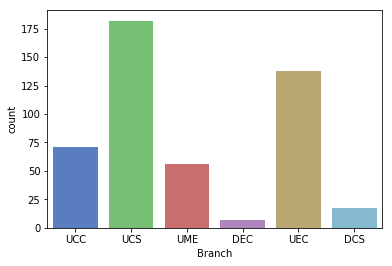

In [25]:
#now we can draw a count plot based on the brach information
ax=sns.countplot(x="Branch",data=final_df,palette="muted")
plt.show()

In [26]:
final_df.Branch.value_counts()

UCS    182
UEC    138
UCC     71
UME     56
DCS     17
DEC      7
Name: Branch, dtype: int64

## Brach wise Failed Students in CP and Cp lab ratio

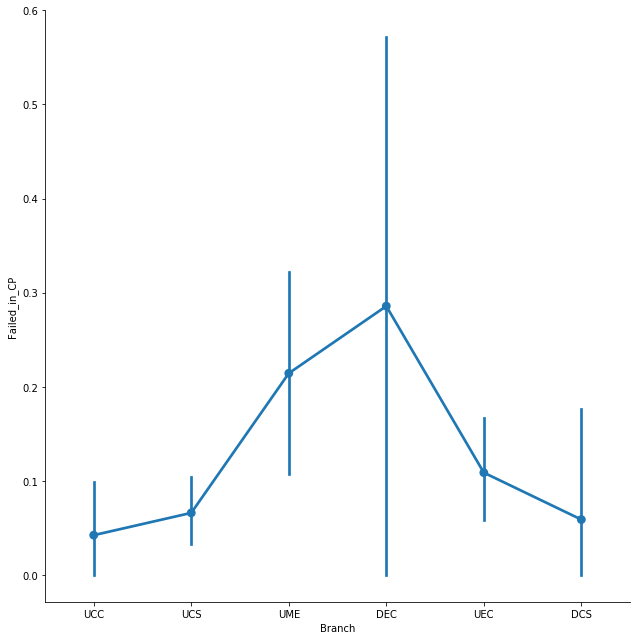

In [27]:
final_df['Failed_in_CP']=np.where(final_df['CP_grade']=='F',1,0)
ax=sns.factorplot('Branch','Failed_in_CP',data=final_df,size=9)
plt.show()

In [28]:
pd.crosstab(final_df['Failed_in_CP'],final_df['Branch'])

Branch,DCS,DEC,UCC,UCS,UEC,UME
Failed_in_CP,,,,,,
0,16,5,68,170,123,44
1,1,2,3,12,15,12


this data shows that 1 student in dcs and 2 in dec and smilarly got failed in CP

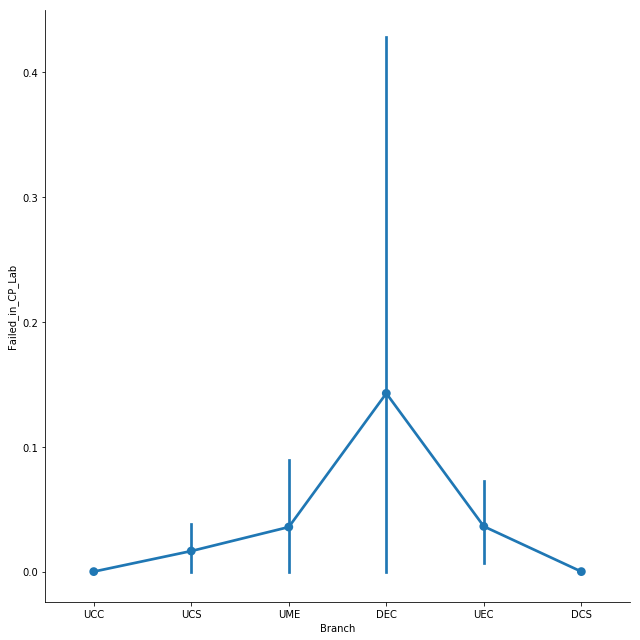

In [29]:
final_df['Failed_in_CP_Lab']=np.where(final_df['CP_Lab_grade']=='F',1,0)
ax=sns.factorplot('Branch','Failed_in_CP_Lab',data=final_df,size=9)
plt.show()

In [30]:
pd.crosstab(final_df['Failed_in_CP_Lab'],final_df['Branch'])

Branch,DCS,DEC,UCC,UCS,UEC,UME
Failed_in_CP_Lab,,,,,,
0,17,6,71,179,133,54
1,0,1,0,3,5,2


##  Plot to show that average midterm marks brach wise

In [31]:
final_df.groupby('Branch').mean()

,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Failed_in_CP,Failed_in_CP_Lab
Branch,,,,,,,,,,,,
DCS,35.470588,6.441176,17.470588,4.852353,16.470588,88.117647,7.323529,14.780000,23.240588,62.814706,0.058824,0.000000
DEC,30.285714,6.285714,11.571429,2.857143,11.571429,64.285714,6.857143,12.618571,16.855714,47.902857,0.285714,0.142857
UCC,31.197183,6.457746,14.957746,4.021080,15.985915,86.450704,6.990563,12.998873,22.763521,57.710563,0.042254,0.000000
UCS,32.560440,6.469780,15.120879,4.453187,17.153846,82.895604,7.498077,13.566923,22.233022,58.419121,0.065934,0.016484
UEC,27.326087,5.811594,14.978261,4.427536,16.420290,78.018116,7.275362,11.386232,20.986304,54.625942,0.108696,0.036232
UME,26.732143,5.991071,13.214286,3.526785,14.357143,71.026786,6.526607,11.138750,18.973393,49.854107,0.214286,0.035714


In [32]:
#the data shows about the averages of the different brach students in different areas
#we can also do
final_df.groupby('Branch').median()

,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Failed_in_CP,Failed_in_CP_Lab
Branch,,,,,,,,,,,,
DCS,34.0,7.00,18.0,5.00,16.0,93.0,7.5,14.17,24.440,62.970,0.0,0.0
DEC,32.0,6.00,12.0,0.00,11.0,49.0,6.5,13.33,14.000,47.330,0.0,0.0
UCC,32.0,6.50,15.0,5.00,16.0,87.0,7.0,13.33,23.000,57.500,0.0,0.0
UCS,32.0,6.50,15.0,3.33,18.0,85.5,7.5,13.33,22.440,59.375,0.0,0.0
UEC,27.0,6.00,15.0,3.75,17.0,84.5,6.5,11.25,22.725,58.210,0.0,0.0
UME,26.5,6.25,13.0,2.50,15.0,72.0,6.5,11.04,18.725,48.710,0.0,0.0


In [33]:
final_df.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade,Branch,Failed_in_CP,Failed_in_CP_Lab
Roll_No,,,,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C,BC,C,UCC,0,0
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D,C,D,UCS,0,0
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A,A,AB,UCS,0,0
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B,AB,B,UCS,0,0
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F,D,F,UCS,1,0


In [34]:
final_df.describe()

,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Failed_in_CP,Failed_in_CP_Lab
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,30.199575,6.214437,14.859873,4.261076,16.322718,80.503185,7.224989,12.583355,21.516603,56.184947,0.095541,0.023355
std,9.018567,1.290589,4.634457,4.005582,6.326396,29.138417,1.854013,3.757475,7.183214,13.932138,0.294274,0.151187
min,3.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.250000,0.000000,16.330000,0.000000,0.000000
25%,24.000000,5.500000,11.000000,0.000000,13.000000,62.750000,6.000000,10.000000,17.330000,46.390000,0.000000,0.000000
50%,31.000000,6.500000,15.000000,3.000000,17.000000,84.000000,7.000000,12.920000,22.440000,57.470000,0.000000,0.000000
75%,37.000000,7.000000,18.000000,8.333330,21.000000,102.250000,8.500000,15.420000,26.670000,65.670000,0.000000,0.000000
max,53.000000,9.500000,25.000000,10.000000,30.000000,143.000000,10.000000,22.080000,37.560000,90.640000,1.000000,1.000000


## this data will furthur help us in the feature selection and extraction process


# For more Plots

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 17UCC031 to 17UME068
Data columns (total 17 columns):
Student_Name        471 non-null object
Mid_Term_Full       471 non-null int64
Quiz1               471 non-null float64
Lab                 471 non-null int64
SQuiz               471 non-null float64
End_Term_Mcq        471 non-null int64
End_Term_Full       471 non-null float64
BQuiz               471 non-null float64
Mid_Term_Agg        471 non-null float64
End_Term_Agg        471 non-null float64
Total_Agg           471 non-null float64
Grade               471 non-null object
CP_Lab_grade        471 non-null object
CP_grade            471 non-null object
Branch              471 non-null object
Failed_in_CP        471 non-null int64
Failed_in_CP_Lab    471 non-null int64
dtypes: float64(7), int64(5), object(5)
memory usage: 86.2+ KB


In [36]:
#firstly we have to convert our CP grades and Lab grades and final grades into ints
def conv(a):
    listf=[]
    if(a=="F"):
        return(0)
    elif(a=="D"):
        return(1)
    elif(a=="CD"):
        return(2)
    elif(a=="C"):
        return(3)
    elif(a=="BC"):
        return(4)
    elif(a=="B"):
        return(5)
    elif(a=="AB"):
        return(6)
    else:
        return(7)
final_df['CP_grade_cov']=[conv(a) for a in final_df['CP_grade']]
final_df['CP_Lab_grade_cov']=[conv(a) for a in final_df['CP_Lab_grade']]
final_df['Final_grade_cov']=[conv(a) for a in final_df['Grade']]
        
        

In [37]:
final_df.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Grade,CP_Lab_grade,CP_grade,Branch,Failed_in_CP,Failed_in_CP_Lab,CP_grade_cov,CP_Lab_grade_cov,Final_grade_cov
Roll_No,,,,,,,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,47.97,C,BC,C,UCC,0,0,3,4,3
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,36.08,D,C,D,UCS,0,0,1,3,1
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,78.19,A,A,AB,UCS,0,0,6,7,7
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,65.36,B,AB,B,UCS,0,0,5,6,5
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,20.50,F,D,F,UCS,1,0,0,1,0


In [38]:
pair_plot_df=final_df[['Quiz1','Mid_Term_Agg','End_Term_Agg','Lab','Total_Agg','CP_grade_cov','CP_Lab_grade_cov','Final_grade_cov']]

In [39]:
pair_plot_df.head()

,Quiz1,Mid_Term_Agg,End_Term_Agg,Lab,Total_Agg,CP_grade_cov,CP_Lab_grade_cov,Final_grade_cov
Roll_No,,,,,,,,
17UCC031,5.5,14.58,14.89,13,47.97,3,4,3
17UCS001,5.5,7.92,14.67,8,36.08,1,3,1
17UCS002,5.5,18.75,28.44,21,78.19,6,7,7
17UCS003,7.0,16.25,22.11,20,65.36,5,6,5
17UCS004,5.0,4.17,5.33,6,20.50,0,1,0


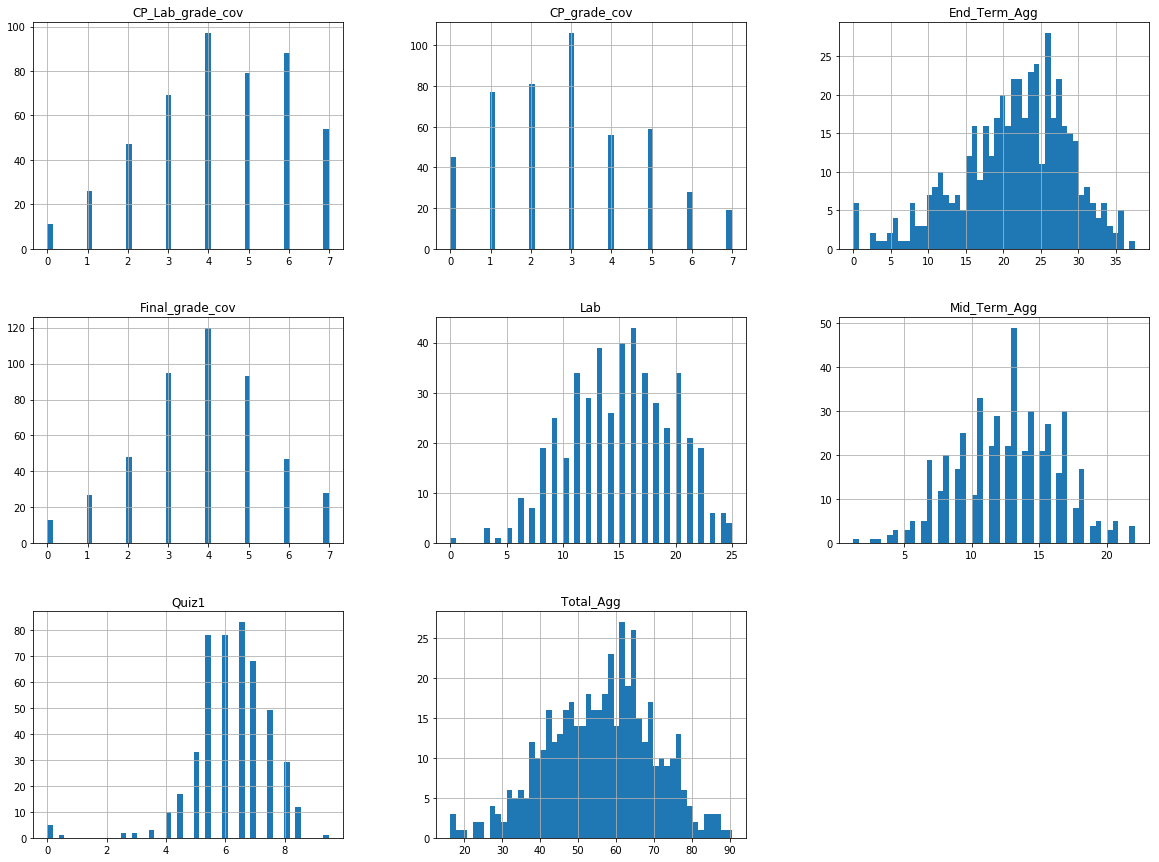

In [40]:
pair_plot_df.hist(bins=50, figsize=(20,15))
plt.show()

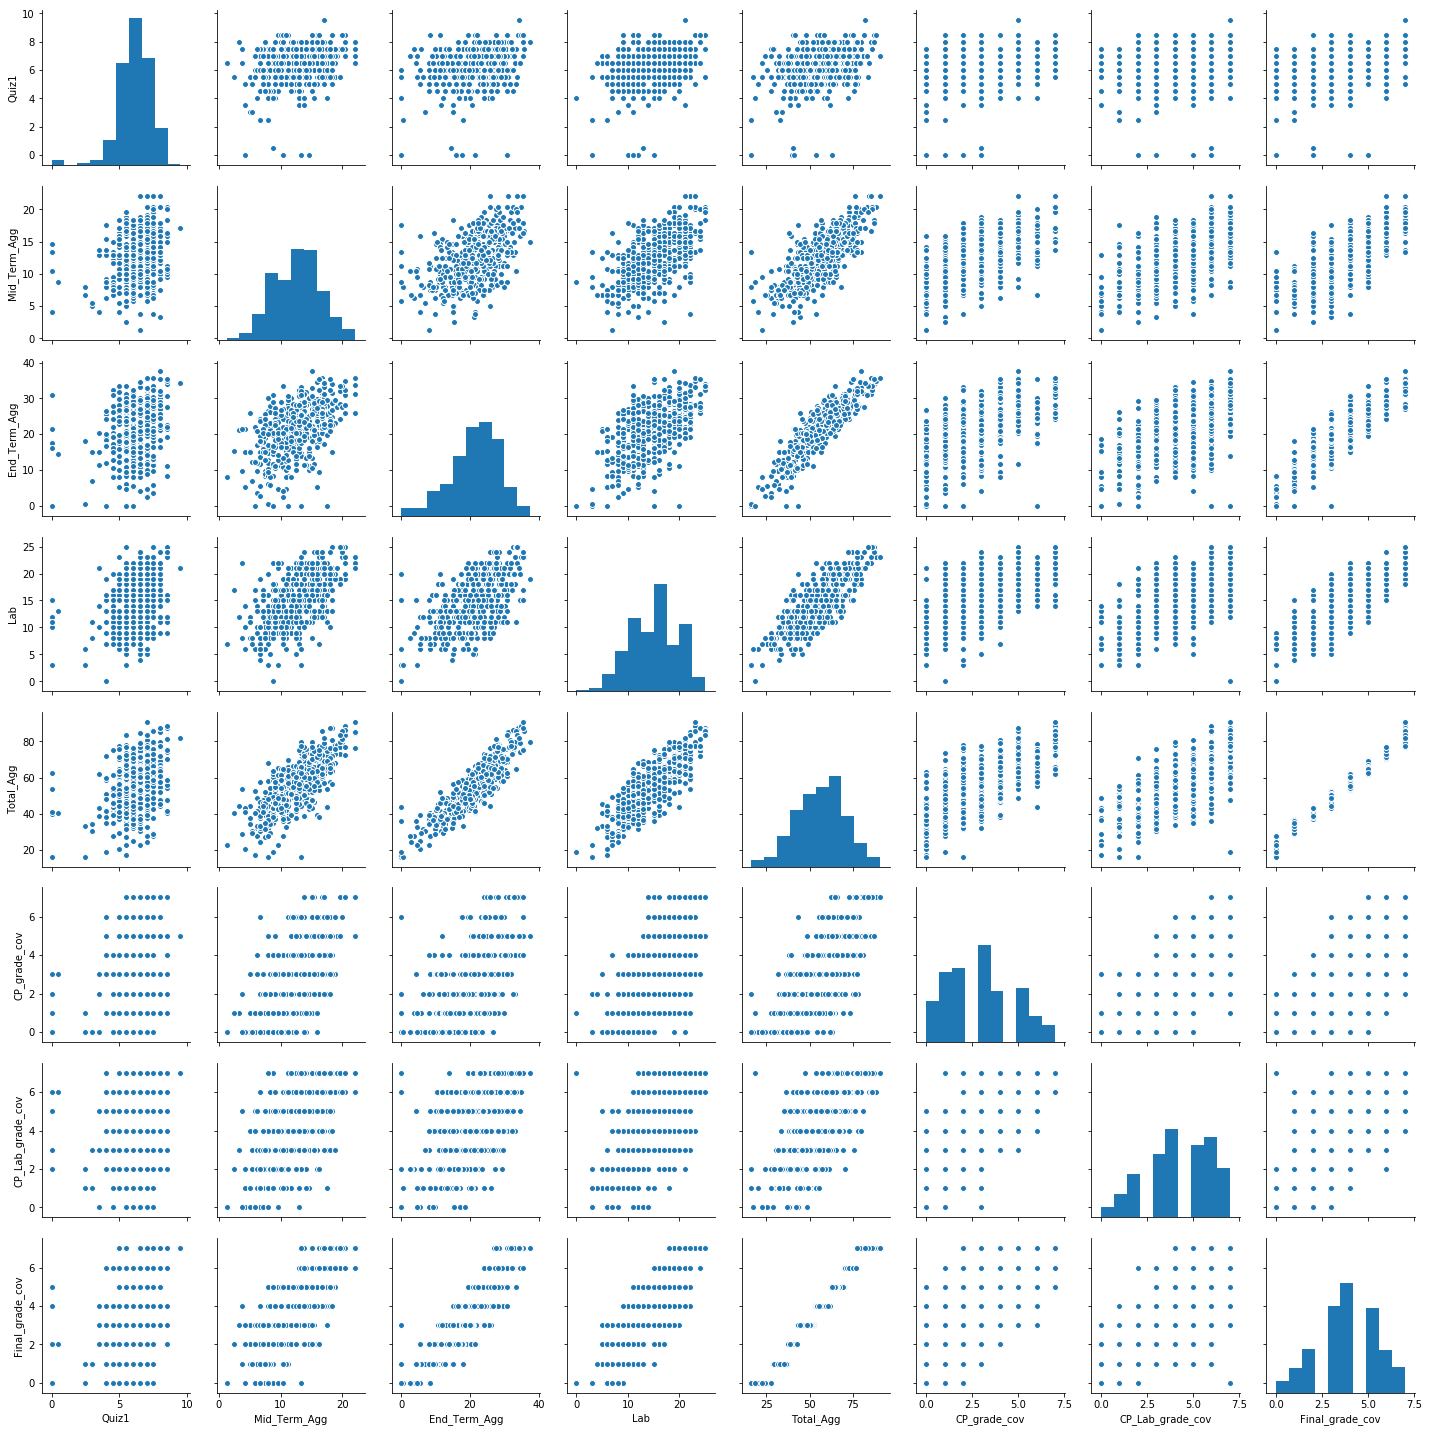

In [41]:
sns.pairplot(pair_plot_df)

## we see by the data the relation all the slope and the others in the line with the slope can be used to make prediction

## here are some more plot based on the different ideas 

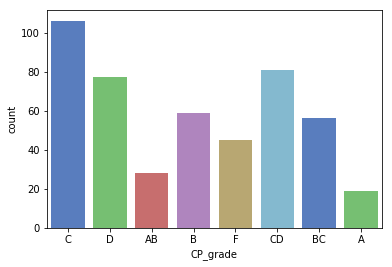

In [42]:
sns.countplot(x="CP_grade",data=final_df,palette='muted')
plt.show()

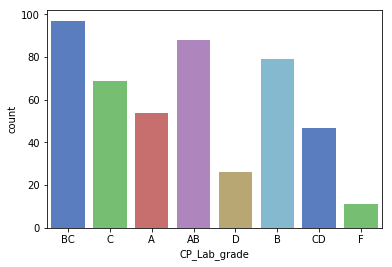

In [43]:
sns.countplot(x="CP_Lab_grade",data=final_df,palette='muted')

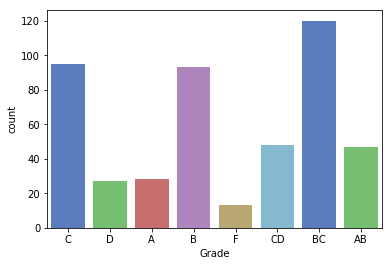

In [44]:
sns.countplot(x="Grade",data=final_df,palette='muted')

## we can see grading is easy in DSA as compared to CP but it is more similar to CP_Lab



## we can realate different marks to different things and see there future impact 

In [45]:
print(final_df.columns.values)

['Student_Name' 'Mid_Term_Full' 'Quiz1' 'Lab' 'SQuiz' 'End_Term_Mcq'
 'End_Term_Full' 'BQuiz' 'Mid_Term_Agg' 'End_Term_Agg' 'Total_Agg' 'Grade'
 'CP_Lab_grade' 'CP_grade' 'Branch' 'Failed_in_CP' 'Failed_in_CP_Lab'
 'CP_grade_cov' 'CP_Lab_grade_cov' 'Final_grade_cov']


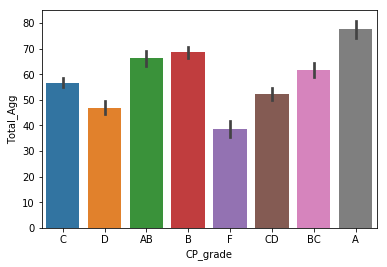

In [46]:
sns.barplot(x="CP_grade",y="Total_Agg",data=final_df)

### we got the idea that those who got b grade preform better than those who got a grade

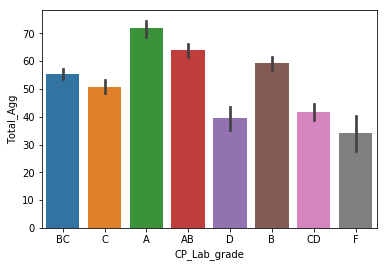

In [47]:
sns.barplot(x="CP_Lab_grade",y="Total_Agg",data=final_df)

### but we can see the clear relation here this shows that those students who did better in prerequisite course did better in dsa courese too

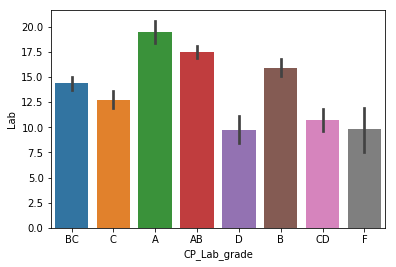

In [48]:
sns.barplot(x="CP_Lab_grade",y="Lab",data=final_df)

In [49]:
final_df['Theory_Agg']=final_df['Total_Agg']-final_df['Lab']

In [50]:
final_df.head()

,Student_Name,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,...,Grade,CP_Lab_grade,CP_grade,Branch,Failed_in_CP,Failed_in_CP_Lab,CP_grade_cov,CP_Lab_grade_cov,Final_grade_cov,Theory_Agg
Roll_No,,,,,,,,,,,,,,,,,,,,,
17UCC031,KHUSH CHAUDHARY,35,5.5,13,3.0,21,46.0,5.5,14.58,14.89,...,C,BC,C,UCC,0,0,3,4,3,34.97
17UCS001,AAYUSH KUMAR MISHRA,19,5.5,8,0.0,17,49.0,5.5,7.92,14.67,...,D,C,D,UCS,0,0,1,3,1,28.08
17UCS002,ABHAY ARAVINDA,45,5.5,21,10.0,27,101.0,10.0,18.75,28.44,...,A,A,AB,UCS,0,0,6,7,7,57.19
17UCS003,ABHAY GUPTA,39,7.0,20,0.0,15,84.5,7.0,16.25,22.11,...,B,AB,B,UCS,0,0,5,6,5,45.36
17UCS004,ABHI MAHAJAN,10,5.0,6,0.0,9,15.0,5.0,4.17,5.33,...,F,D,F,UCS,1,0,0,1,0,14.50


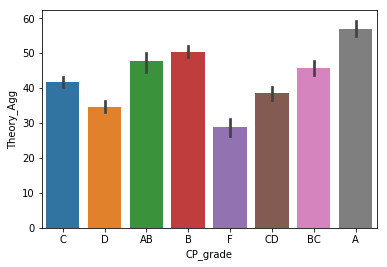

In [51]:
sns.barplot(x="CP_grade",y='Theory_Agg',data=final_df)

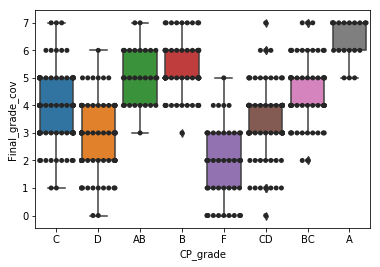

In [52]:
#box and swarm plots can also make us do better analysis of the dataset
Plot=sns.boxplot(x="CP_grade",y="Final_grade_cov",data=final_df)
Plot=sns.swarmplot(x="CP_grade",y="Final_grade_cov",data=final_df,color=".15")
plt.show()

## Some more Basic Plots to prove above hypothesis

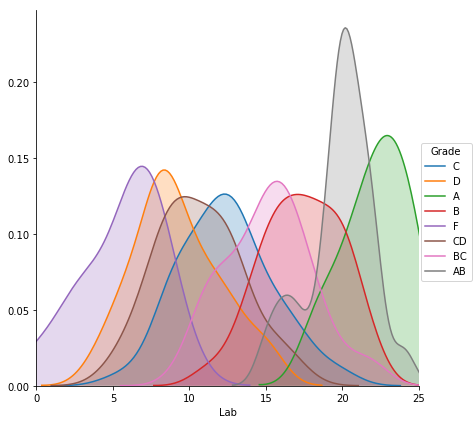

In [53]:
Facetgrid = sns.FacetGrid(final_df,hue="Grade",size=6)
Facetgrid.map(sns.kdeplot,'Lab',shade=True)
Facetgrid.set(xlim=(0,final_df['Lab'].max()))
Facetgrid.add_legend()

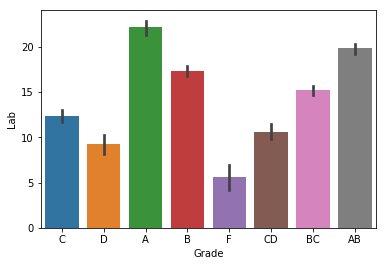

In [54]:
sns.barplot(x="Grade",y="Lab",data=final_df)

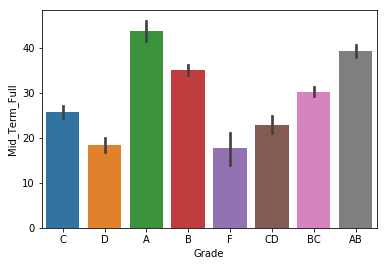

In [55]:
sns.barplot(x="Grade",y="Mid_Term_Full",data=final_df)

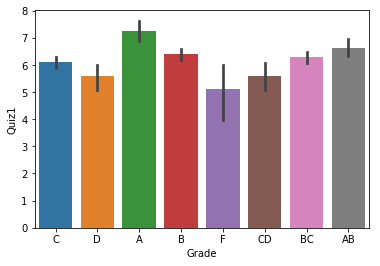

In [56]:
sns.barplot(x="Grade",y="Quiz1",data=final_df)

# There can be so more plot discribing the same thigs

## the results----

1.Lab marks direcltly corelate to performance in both prerequisite course and this course

2.End terms marks are also a good measure to identify the performance

3.lab grade and is also a good measure to find the current performance

4.marking of prerequisite course was not satisfactory so it does not signify such relation

5.Mid term performace also realte well

6.Quiz performace does not corelate that well but we can use it to show minor difference


# Prediction in the basis of result

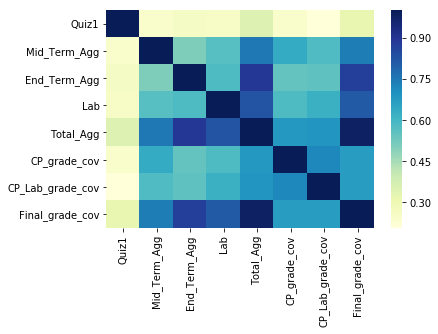

In [57]:
sns.heatmap(pair_plot_df.corr(),cmap="YlGnBu")

In [58]:
final_df.corr()

,Mid_Term_Full,Quiz1,Lab,SQuiz,End_Term_Mcq,End_Term_Full,BQuiz,Mid_Term_Agg,End_Term_Agg,Total_Agg,Failed_in_CP,Failed_in_CP_Lab,CP_grade_cov,CP_Lab_grade_cov,Final_grade_cov,Theory_Agg
Mid_Term_Full,1.000000,0.242273,0.568268,0.159846,0.331508,0.489262,0.236236,1.000000,0.505925,0.751024,-0.349527,-0.242174,0.637588,0.580051,0.743391,0.749889
Quiz1,0.242273,1.000000,0.254220,0.113016,0.238285,0.240368,0.467220,0.242244,0.263306,0.347854,-0.101679,-0.042078,0.245159,0.208721,0.322931,0.351317
Lab,0.568268,0.254220,1.000000,0.223032,0.393850,0.561363,0.290501,0.568233,0.583125,0.825206,-0.350545,-0.168405,0.584812,0.621869,0.808881,0.657244
SQuiz,0.159846,0.113016,0.223032,1.000000,0.177436,0.313545,0.795184,0.159833,0.317363,0.386768,-0.109063,-0.050493,0.227360,0.248276,0.380147,0.417084
End_Term_Mcq,0.331508,0.238285,0.393850,0.177436,1.000000,0.422505,0.262108,0.331467,0.576600,0.552580,-0.225741,-0.090203,0.351993,0.333191,0.545923,0.562516
End_Term_Full,0.489262,0.240368,0.561363,0.313545,0.422505,1.000000,0.328701,0.489286,0.984137,0.869849,-0.341218,-0.232326,0.531571,0.543667,0.850524,0.911507
BQuiz,0.236236,0.467220,0.290501,0.795184,0.262108,0.328701,1.000000,0.236204,0.347603,0.472657,-0.128554,-0.060534,0.263580,0.289992,0.459042,0.501743
Mid_Term_Agg,1.000000,0.242244,0.568233,0.159833,0.331467,0.489286,0.236204,1.000000,0.505938,0.751015,-0.349517,-0.242199,0.637586,0.580010,0.743372,0.749893
End_Term_Agg,0.505925,0.263306,0.583125,0.317363,0.576600,0.984137,0.347603,0.505938,1.000000,0.892274,-0.351753,-0.227071,0.548076,0.555303,0.873552,0.931770
Total_Agg,0.751024,0.347854,0.825206,0.386768,0.552580,0.869849,0.472657,0.751015,0.892274,1.000000,-0.409345,-0.246471,0.684158,0.688200,0.981046,0.968063


## Making test and cross validation sets

In [59]:
print(final_df.columns.values)

['Student_Name' 'Mid_Term_Full' 'Quiz1' 'Lab' 'SQuiz' 'End_Term_Mcq'
 'End_Term_Full' 'BQuiz' 'Mid_Term_Agg' 'End_Term_Agg' 'Total_Agg' 'Grade'
 'CP_Lab_grade' 'CP_grade' 'Branch' 'Failed_in_CP' 'Failed_in_CP_Lab'
 'CP_grade_cov' 'CP_Lab_grade_cov' 'Final_grade_cov' 'Theory_Agg']


In [60]:
def convB(a):
    if(a=="UCC"):
        return(4)
    elif(a=="UCS"):
        return(3)
    elif(a=="UME"):
        return(2)
    elif(a=="UEC"):
        return(1)
    elif(a=="DCS"):
        return(5)
    else:
        return(0)
final_df['Branch_cov']=[convB(a) for a in final_df['Branch']]


In [61]:
Pred_df=final_df[["Mid_Term_Agg","End_Term_Agg","Lab","Quiz1","Branch_cov","CP_grade_cov","CP_Lab_grade_cov","Total_Agg","Final_grade_cov"]]

In [62]:
Pred_df.head()

,Mid_Term_Agg,End_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov,Total_Agg,Final_grade_cov
Roll_No,,,,,,,,,
17UCC031,14.58,14.89,13,5.5,4,3,4,47.97,3
17UCS001,7.92,14.67,8,5.5,3,1,3,36.08,1
17UCS002,18.75,28.44,21,5.5,3,6,7,78.19,7
17UCS003,16.25,22.11,20,7.0,3,5,6,65.36,5
17UCS004,4.17,5.33,6,5.0,3,0,1,20.50,0


## We have to do feature scaling for better prediction

## we have to do stratifiedsufflesplit to protect our prediction from sampling bias

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

In [64]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Pred_df, test_size=0.2, random_state=42)

In [65]:
train_set.head()

,Mid_Term_Agg,End_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov,Total_Agg,Final_grade_cov
Roll_No,,,,,,,,,
17UCS139,7.92,8.22,7,4.5,3,0,1,27.64,0
17UCS022,11.25,0.00,15,5.5,3,2,6,36.25,1
17UCS141,15.00,19.33,11,6.5,3,4,4,51.83,3
17UCS046,6.25,9.78,10,6.0,3,3,1,32.03,1
17UME056,7.92,20.00,16,4.0,2,1,4,47.92,3


In [66]:
corr_matrix = Pred_df.corr()
corr_matrix["Final_grade_cov"].sort_values(ascending=False)

Final_grade_cov     1.000000
Total_Agg           0.981046
End_Term_Agg        0.873552
Lab                 0.808881
Mid_Term_Agg        0.743372
CP_grade_cov        0.672864
CP_Lab_grade_cov    0.671835
Quiz1               0.322931
Branch_cov          0.160819
Name: Final_grade_cov, dtype: float64

In [67]:
Train_X=train_set.drop(["End_Term_Agg","Final_grade_cov","Total_Agg"],axis=1)
Train_X.head()

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS139,7.92,7,4.5,3,0,1
17UCS022,11.25,15,5.5,3,2,6
17UCS141,15.00,11,6.5,3,4,4
17UCS046,6.25,10,6.0,3,3,1
17UME056,7.92,16,4.0,2,1,4


In [68]:
Train_Y_Mark = train_set["End_Term_Agg"].copy()

In [69]:
Train_Y_FMark = train_set["Total_Agg"].copy()

In [70]:
Train_Y = train_set["Final_grade_cov"].copy()

## Finally we are ready to do the prediction

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [72]:
lin_reg.fit(Train_X,Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",lin_reg.predict(some_data))

Predictions:	 [2.92401486 5.77424377 3.82479407 3.86852632 2.83276774 4.08098065
 3.66018482 3.84355186]


In [74]:
print("Labels\t\t",list(some_labels))

Labels		 [4, 6, 4, 2, 3, 4, 2, 4]


In [75]:
Train_X.head()

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS139,7.92,7,4.5,3,0,1
17UCS022,11.25,15,5.5,3,2,6
17UCS141,15.00,11,6.5,3,4,4
17UCS046,6.25,10,6.0,3,3,1
17UME056,7.92,16,4.0,2,1,4


In [76]:
Test_X=test_set.drop(["End_Term_Agg","Final_grade_cov","Total_Agg"],axis=1)
Test_Y=test_set["Final_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = lin_reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7634791113450162

In [77]:
#np.round(lin_reg.predict([[25,25,10,4,7,7]]))
some_data

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS124,10.00,11,8.0,3,3,3
17UCC020,15.00,22,7.5,4,3,6
17UCS058,11.25,16,6.5,3,2,4
17UEC073,10.83,16,5.0,1,3,6
17UME044,9.17,12,6.5,2,3,3
17UCC045,17.08,12,5.0,4,2,7
17UCS024,14.58,11,7.0,3,3,5
17UCS017,10.83,16,5.5,3,3,5


## We can see error is very less as we have did proper research before applying model

# Applying differnt models

In [78]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Train_X,Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [79]:
Grade_predictions = tree_reg.predict(Test_X)
tree_mse = mean_squared_error(Test_Y, Grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.1285761872936695

In [80]:
#error is more than our previous model may be this is because overfitting
#we can use cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.1148271720325926

In [81]:
#error is slighly less
#we do cross validation on our previous model
lin_scores = cross_val_score(lin_reg, Train_X, Train_Y,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

0.7582927245595359

 error is slightly less than before

In [82]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Train_X,Train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [83]:
scores = cross_val_score(forest_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

0.83096420064084

In [84]:
#error is more than the linear regression
#it is time to try a new model of svm regressor
from sklearn.svm import SVR
svm_reg=SVR(C=1.0,epsilon=0.2)
svm_reg.fit(Train_X,Train_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
scores = cross_val_score(svm_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.0838206252263058

In [86]:
#it also has more error than svm calssifier than do the final test on the test set
Grade_predictions = svm_reg.predict(Test_X)
svm_mse = mean_squared_error(Test_Y, Grade_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.9574994752478193

In [87]:
Grade_predictions = forest_reg.predict(Test_X)
forest_mse = mean_squared_error(Test_Y, Grade_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.9047826141938009

# At the final we decided that Linear regerssion is the best model

In [88]:
#######################Anubhav Natani###########3

## Many things are not in this notebook which will be there in the final notebook
## Piplines 
## one hot encoding 
## nureal network regressor
## Ensemble regressor
## more features
## fine tuning model
## And Other things



In [89]:
Train_X.head()

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS139,7.92,7,4.5,3,0,1
17UCS022,11.25,15,5.5,3,2,6
17UCS141,15.00,11,6.5,3,4,4
17UCS046,6.25,10,6.0,3,3,1
17UME056,7.92,16,4.0,2,1,4


In [90]:
Train_Y.head()

Roll_No
17UCS139    0
17UCS022    1
17UCS141    3
17UCS046    1
17UME056    3
Name: Final_grade_cov, dtype: int64

In [91]:
Train_X.to_csv('train.csv',index="False")

In [92]:
yy=pd.read_csv('train.csv')
yy.head()

,Roll_No,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
0,17UCS139,7.92,7,4.5,3,0,1
1,17UCS022,11.25,15,5.5,3,2,6
2,17UCS141,15.00,11,6.5,3,4,4
3,17UCS046,6.25,10,6.0,3,3,1
4,17UME056,7.92,16,4.0,2,1,4


In [93]:
Train_X.head()

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS139,7.92,7,4.5,3,0,1
17UCS022,11.25,15,5.5,3,2,6
17UCS141,15.00,11,6.5,3,4,4
17UCS046,6.25,10,6.0,3,3,1
17UME056,7.92,16,4.0,2,1,4


In [94]:
Train_X.to_csv('trains.csv')

In [95]:
ss=pd.read_csv('trains.csv')
ss.head()

,Roll_No,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
0,17UCS139,7.92,7,4.5,3,0,1
1,17UCS022,11.25,15,5.5,3,2,6
2,17UCS141,15.00,11,6.5,3,4,4
3,17UCS046,6.25,10,6.0,3,3,1
4,17UME056,7.92,16,4.0,2,1,4


In [96]:
Train_Y_df=pd.DataFrame(Train_Y)

In [97]:
Train_Y_df.head()

,Final_grade_cov
Roll_No,
17UCS139,0
17UCS022,1
17UCS141,3
17UCS046,1
17UME056,3


In [98]:
Train_Y_df.to_csv('train_y.csv')

In [99]:
Test_X.to_csv('test.csv')

In [100]:
Test_Y_df=pd.DataFrame(Test_Y)
Test_Y_df.to_csv('test_y.csv')

In [101]:
aa=pd.read_csv('test.csv',index_col=0)
aa.head()

,Mid_Term_Agg,Lab,Quiz1,Branch_cov,CP_grade_cov,CP_Lab_grade_cov
Roll_No,,,,,,
17UCS056,6.67,5,6.5,3,0,1
17UCS075,12.92,11,6.5,3,1,2
17UCS033,10.42,13,6.5,3,1,4
17UME037,12.92,15,5.0,2,5,5
17UME010,7.92,13,6.5,2,0,0


In [102]:
len(Train_X)==len(Train_Y)
yu=pd.read_csv('train_y.csv',index_col=0)
yu.head()

,Final_grade_cov
Roll_No,
17UCS139,0
17UCS022,1
17UCS141,3
17UCS046,1
17UME056,3


In [103]:
kk=pd.read_csv('test_y.csv',index_col=0)
kk.head()

,Final_grade_cov
Roll_No,
17UCS056,1
17UCS075,4
17UCS033,3
17UME037,4
17UME010,1


In [105]:
from sklearn.preprocessing import StandardScaler


In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(Train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
Train_X_new=scaler.transform(Train_X)
Test_X_new=scaler.transform(Test_X)

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [113]:
mlp.fit(Train_X_new,Train_Y)

/home/anubhav/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, Train_X_new, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

/home/anubhav/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/anubhav/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/anubhav/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/anubhav/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

0.9543396351673549

In [ ]:
from sklearn.metrics import mean_squared_error
Grade_predictions = mlp.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse